In [24]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt


In [20]:
df = pd.read_csv("fountains-distances-join-fountains-counts.csv")

In [21]:
df.head(4)

,id,nearest_rev,nearest_fountain,nearest_rvertes,nearest_pcyclable,nearest_murbain,nearest_iexterne,min_col,min_val,longitude,latitude,objectid,superficie,count
0,1,2697.569104,48.907970,2512.295088,176.113692,2529.702004,21,nearest_iexterne,21.446787,-73.589462,45.592012,5069,11.80462,5
1,2,2745.451551,1.408827,2541.866572,167.330400,2495.967421,33,nearest_fountain,1.408827,-73.590055,45.592189,5069,11.80462,5
2,3,2744.043719,1.408827,2540.756133,167.190902,2497.152536,32,nearest_fountain,1.408827,-73.590041,45.592181,5069,11.80462,5
3,4,2582.406191,141.348494,2371.053545,84.592035,2670.529930,18,nearest_iexterne,18.837126,-73.589008,45.590781,5069,11.80462,5


In [22]:
# Calculer la moyenne, la médiane et l'écart-type des superficies
mean = df['superficie'].mean()
median = df['superficie'].median()
std_dev = df['superficie'].std()

# Afficher les métriques calculées
print('Moyenne:', mean)
print('Médiane:', median)
print('Écart-type:', std_dev)


Moyenne: 13.960604611622218
Médiane: 3.035777555756644
Écart-type: 37.1797335935118


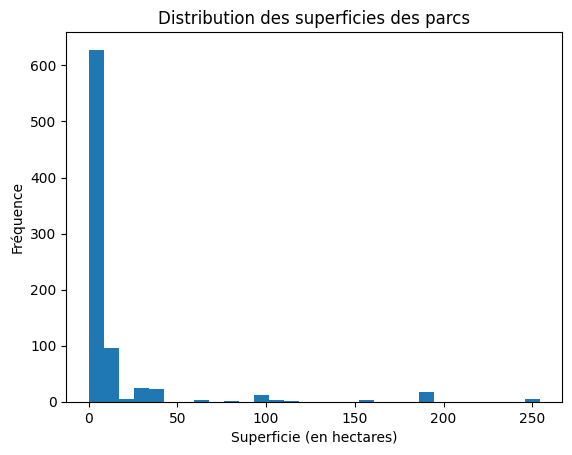

In [25]:
# Générer un histogramme des superficies
plt.hist(df['superficie'], bins=30)

# Ajouter un titre et des labels d'axes
plt.title('Distribution des superficies des parcs')
plt.xlabel('Superficie (en hectares)')
plt.ylabel('Fréquence')

# Afficher le graphique
plt.show()


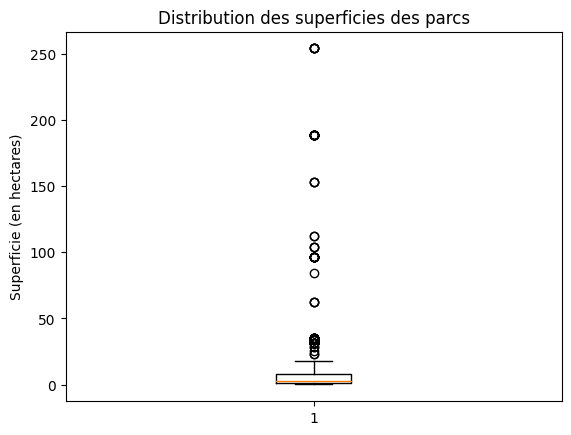

In [26]:
# Générer une boîte à moustaches des superficies
plt.boxplot(df['superficie'])

# Ajouter un titre et un label d'axe
plt.title('Distribution des superficies des parcs')
plt.ylabel('Superficie (en hectares)')

# Afficher le graphique
plt.show()


In [56]:
print(f"length < 1 (ha): {len(df[df['superficie'] < 1])}")
print(f"length 1-5 (ha): {len(df[(df['superficie'] >= 1) & (df['superficie'] < 5)])}")
print(f"length 5-10 (ha): {len(df[(df['superficie'] >= 5) & (df['superficie'] < 10)])}")
print(f"length 10-20 (ha): {len(df[(df['superficie'] >= 10) & (df['superficie'] < 20)])}")
print(f"length 20-100 (ha): {len(df[(df['superficie'] >= 20) & (df['superficie'] < 100)])}")
print(f"length > 100 (ha): {len(df[df['superficie'] > 100])}")

length < 1 (ha): 230
length 1-5 (ha): 299
length 5-10 (ha): 113
length 10-20 (ha): 84
length 20-100 (ha): 66
length > 100 (ha): 31


In [83]:
# Calcul de la dédiane du nombre de fontaines pour chaque catégorie
median_fontaines_par_categorie = df.groupby('categorie')['count'].median().round()

# Affichage des résultats
print(median_fontaines_par_categorie)

categorie
<1 ha         1.0
1-5 ha        2.0
5-10 ha       4.0
10-20 ha      4.0
20-100 ha    10.0
>100 ha      18.0
Name: count, dtype: float64


In [85]:
# 5-10 ha       4.0
# 10-20 ha      4.0
# ces deux catégories ont la même médiane, donc on peux les combiner ensemble (5-20 ha)

print(f"length < 1 (ha): {len(df[df['superficie'] < 1])}")
print(f"length 1-5 (ha): {len(df[(df['superficie'] >= 1) & (df['superficie'] < 5)])}")
print(f"length 5-20 (ha): {len(df[(df['superficie'] >= 5) & (df['superficie'] < 20)])}")
print(f"length 20-100 (ha): {len(df[(df['superficie'] >= 20) & (df['superficie'] < 100)])}")
print(f"length > 100 (ha): {len(df[df['superficie'] > 100])}")

length < 1 (ha): 230
length 1-5 (ha): 299
length 5-20 (ha): 197
length 20-100 (ha): 66
length > 100 (ha): 31


In [86]:
# # Définition des intervalles de catégories
# bins = [0, 1, 5, 10, 20, 100, float('inf')]

# # Définition des étiquettes de catégories
# labels = ['<1 ha', '1-5 ha', '5-10 ha', '10-20 ha', '20-100 ha', '>100 ha']

bins = [0, 1, 5, 20, 100, float('inf')]
labels = ['< 1', '1-5', '5-20', '20-100', '> 100']

# Ajout d'une colonne 'categorie' au DataFrame pour stocker la catégorie de chaque superficie
df['categorie'] = pd.cut(df['superficie'], bins=bins, labels=labels)

In [87]:
df.head(10)

,id,nearest_rev,nearest_fountain,nearest_rvertes,nearest_pcyclable,nearest_murbain,nearest_iexterne,min_col,min_val,longitude,latitude,objectid,superficie,count,categorie
0,1,2697.569104,48.907970,2512.295088,176.113692,2529.702004,21,nearest_iexterne,21.446787,-73.589462,45.592012,5069,11.804620,5,5-20
1,2,2745.451551,1.408827,2541.866572,167.330400,2495.967421,33,nearest_fountain,1.408827,-73.590055,45.592189,5069,11.804620,5,5-20
2,3,2744.043719,1.408827,2540.756133,167.190902,2497.152536,32,nearest_fountain,1.408827,-73.590041,45.592181,5069,11.804620,5,5-20
3,4,2582.406191,141.348494,2371.053545,84.592035,2670.529930,18,nearest_iexterne,18.837126,-73.589008,45.590781,5069,11.804620,5,5-20
4,5,2864.119220,126.598086,2456.527385,79.330947,2419.307259,29,nearest_iexterne,29.983704,-73.591582,45.592574,5069,11.804620,5,5-20
5,6,3534.705795,27.573425,1804.390143,117.454592,1886.561243,33,nearest_fountain,27.573425,-73.598465,45.596198,5009,6.550266,2,5-20
6,7,3507.149861,27.573425,1830.292244,125.924980,1908.962793,22,nearest_iexterne,22.679090,-73.598198,45.596035,5009,6.550266,2,5-20
7,8,3669.838151,73.121037,1413.608266,17.997478,2520.888872,14,nearest_iexterne,14.328401,-73.605997,45.590096,5029,7.707700,4,5-20
8,9,3633.569132,73.121037,1359.185286,79.001852,2593.969774,29,nearest_iexterne,29.385897,-73.606028,45.589438,5029,7.707700,4,5-20
9,10,3665.119453,1.275940,1286.954598,90.910563,2638.840073,12,nearest_fountain,1.275940,-73.606822,45.589075,5029,7.707700,4,5-20


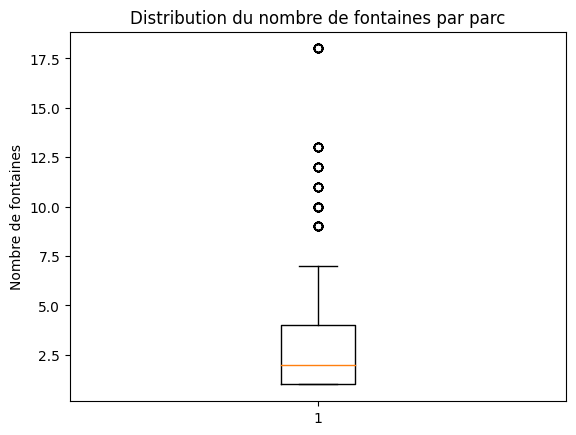

count    823.000000
mean       3.359660
std        3.600409
min        1.000000
25%        1.000000
50%        2.000000
75%        4.000000
max       18.000000
Name: count, dtype: float64


In [88]:
# Calculer les statistiques descriptives du nombre de fontaines par parc
stats = df['count'].describe()

# Créer un diagramme en boîte du nombre de fontaines par parc
plt.boxplot(df['count'])
plt.ylabel('Nombre de fontaines')
plt.title('Distribution du nombre de fontaines par parc')
plt.show()

# Calculer les statistiques descriptives du nombre de fontaines par parc
stats = df['count'].describe()
print(stats)

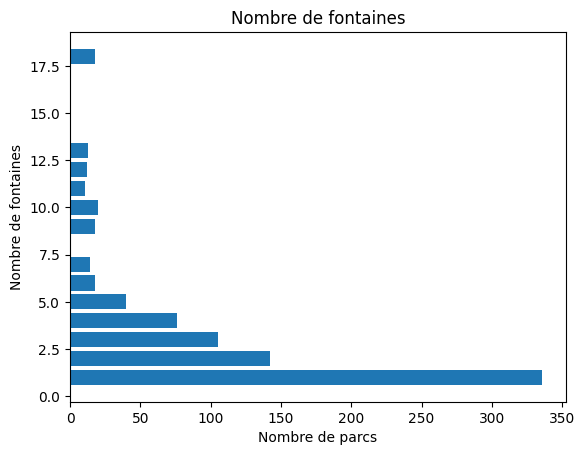

In [89]:
import matplotlib.pyplot as plt

# Calcul du nombre de parcs pour chaque nombre de fontaines
counts = df["count"].value_counts()

# Création du graphe en barres horizontal
plt.barh(counts.index, counts.values)

# Ajout de labels et titres
plt.xlabel("Nombre de parcs")
plt.ylabel("Nombre de fontaines")
plt.title("Nombre de fontaines")
plt.show()

In [90]:
pd.set_option('display.max_rows', None)


# Calcul de la moyenne du nombre de fontaines pour chaque catégorie
mean_fontaines_par_categorie = df.groupby('categorie')['count'].mean()

# Affichage des résultats
print(mean_fontaines_par_categorie)


categorie
< 1        1.121739
1-5        2.150502
5-20       4.502538
20-100     9.181818
> 100     11.967742
Name: count, dtype: float64


In [91]:
# Calcul de la moyenne du nombre de fontaines pour chaque catégorie
mean_fontaines_par_categorie = df.groupby('categorie')['count'].mean().round()

# Affichage des résultats
print(mean_fontaines_par_categorie)

categorie
< 1        1.0
1-5        2.0
5-20       5.0
20-100     9.0
> 100     12.0
Name: count, dtype: float64


In [92]:
# Calcul de la dédiane du nombre de fontaines pour chaque catégorie
median_fontaines_par_categorie = df.groupby('categorie')['count'].median().round()

# Affichage des résultats
print(median_fontaines_par_categorie)

categorie
< 1        1.0
1-5        2.0
5-20       4.0
20-100    10.0
> 100     18.0
Name: count, dtype: float64
